In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# namespaces
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
import math

labels = np.array(['Hydrant','Stair','Car','Crosswalk','Palm','Bus','Other','Traffic Light','Motorcycle','Chimney','Bridge','Bicycle'])
count_total = np.array([958,212,3565,1247,917,1313,1346,796,83,126,537,788]) # number of pictures in each class
count_train = count_total * 0.9
count_train = count_train.astype('int') # number of train of each class
count_test = count_total - count_train # number of test of each class

x_train = []
y_train = []

x_test = []
y_test = []

In [ ]:
# Converting images to datasets
for i in range(max(count_train)):
    for j in range(labels.shape[0]):
        if i < count_total[j]:
            path = '/content/drive/MyDrive/CS254/CS254-Project/Images/' + labels[j] + '/' + labels[j] +  ' (' + str(i) + ').png'
            print(path, ' ========> Progress:', str(round(i/max(count_total)*100, 2)) + '%')
            data_import = np.array(cv2.imread(path))
            data_import = cv2.resize(data_import, (120, 120),interpolation = cv2.INTER_AREA)
            data_import = data_import.astype('float32')
            data_import = data_import / 255 
            data_import = data_import[:,:,::-1]
            if i < count_train[j]:
                x_train.append(data_import)
                y_train.append(j)
            if i >= count_train[j]:
                x_test.append(data_import)
                y_test.append(j)

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

print('x_train shape:',x_train.shape)
print('y_train shape:' ,y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape', y_test.shape)

np.savez('/content/drive/MyDrive/CS254/CS254-Project/project_data.npz', x_train=x_train, y_train=y_train, x_test=x_test, y_test=y_test)

/content/drive/MyDrive/CS254/CS254-Project/Images/Hydrant/Hydrant (0).png  ========> Progress: 0.0%


KeyboardInterrupt: ignored

In [ ]:
# Loading dataset from disk, can start at here when open this script
data_load = np.load('/content/drive/MyDrive/CS254/CS254-Project/project_data.npz')
x_train = data_load['x_train']
y_train = data_load['y_train']
x_test = data_load['x_test']
y_test = data_load['y_test']

print('x_train shape:',x_train.shape)
print('y_train shape:' ,y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape', y_test.shape)

x_train shape: (11448, 120, 120, 3)
y_train shape: (11448,)
x_test shape: (837, 120, 120, 3)
y_test shape (837,)


In [ ]:
def show_images(dataset, size=0):
    plt.figure(figsize = (12,15)) 
    plt.suptitle("Image Samples")
    for i in range(size):
        plt.subplot(int(math.sqrt(size)), int(math.sqrt(size)), i+1) # Position of each figures
        plt.imshow(dataset[i])
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(labels[y_train[i]])
    plt.show()

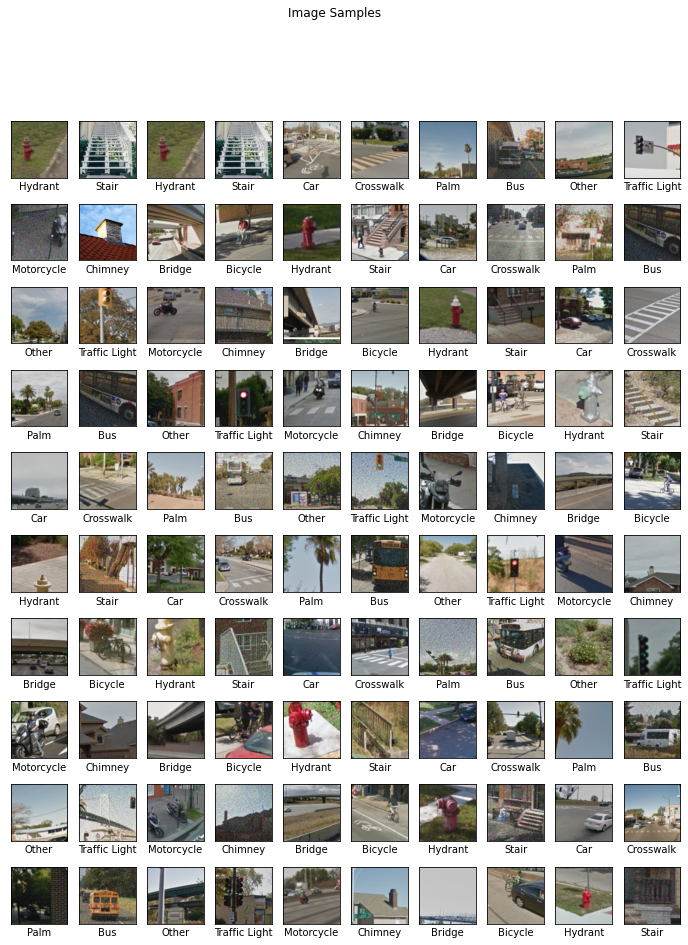

In [ ]:
# Show images
show_images(x_train, size=100)

In [ ]:
# Learning model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [ ]:
# Model setting
model = Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (120, 120, 3))) # Conv 1

model.add(MaxPool2D((2,2))) # Pool 1

model.add(Conv2D(64,(3,3), activation = 'relu')) # Conv 2

model.add(MaxPool2D((2,2))) # Pool 2

model.add(Conv2D(64,(3,3), activation = 'relu')) # Conv 3

model.add(MaxPool2D((2,2))) # Pool 3

model.add(Conv2D(64,(3,3), activation = 'relu')) # Conv 4

model.add(MaxPool2D((2,2))) # Pool 4

model.add(Conv2D(64,(3,3), activation = 'relu')) # Conv 5

model.add(MaxPool2D((2,2))) # Pool 5

model.add(Flatten()) # Flatten

model.add(Dense(1024,activation = 'relu')) # 32 Fully Connected

model.add(Dense(1024,activation = 'relu')) # 32 Fully Connected

model.add(Dense(len(labels))) # 12 Outputs

model.compile(optimizer = 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 59, 59, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 28, 28, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 64)      

In [ ]:
history = model.fit(x_train, y_train, batch_size=16, epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
716/716 [==============================] - 301s 419ms/step - loss: 2.1251 - accuracy: 0.3038 - val_loss: 2.1057 - val_accuracy: 0.1708
Epoch 2/10
716/716 [==============================] - 299s 417ms/step - loss: 1.7562 - accuracy: 0.4100 - val_loss: 1.8528 - val_accuracy: 0.3118
Epoch 3/10
716/716 [==============================] - 297s 415ms/step - loss: 1.5760 - accuracy: 0.4608 - val_loss: 1.5760 - val_accuracy: 0.4182
Epoch 4/10
716/716 [==============================] - 296s 414ms/step - loss: 1.4503 - accuracy: 0.5004 - val_loss: 1.5454 - val_accuracy: 0.4875
Epoch 5/10
716/716 [==============================] - 297s 414ms/step - loss: 1.3322 - accuracy: 0.5441 - val_loss: 1.6683 - val_accuracy: 0.4122
Epoch 6/10
716/716 [==============================] - 295s 413ms/step - loss: 1.2354 - accuracy: 0.5729 - val_loss: 1.4477 - val_accuracy: 0.5102
Epoch 7/10
716/716 [==============================] - 296s 414ms/step - loss: 1.1566 - accuracy: 0.5959 - val_loss: 1.4285 -